# Student Performance

Dataset: https://www.kaggle.com/datasets/neurocipher/student-performance/code

Dataset explanation: This dataset explores how study hours, motivation, and lifestyle habits affect students’ exam scores.

Purpose: To analyze the data and build a machine learning model that predicts student performance based on their habits.

Models used in this project: Random Forest, Gradient Boosting, KNN, and Linear Regression.


### Loading and importing the necessary libraries, checking the environment, and suppressing warnings.

In [1]:
#Data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

print("Loading succesfully")

Loading succesfully


In [2]:
df = pd.read_csv("StudentPerformance.csv")
print("First 5 rows")
df.head()

First 5 rows


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
print("-" * 40)
print("SHAPE")
print("-" * 40)
print(df.shape)

print("-" * 40)
print("İNFO")
print("-" * 40)
print(df.info())

print("-" * 40)
print("DESCRİBE")
print("-" * 40)
print(df.describe())

print("-" * 40)
print("COLUMNS  ")
print("-" * 40)
print(df.columns)


----------------------------------------
SHAPE
----------------------------------------
(10000, 6)
----------------------------------------
İNFO
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
----------------------------------------
DESCRİBE
----------------------------------------
       Hours Studied  Previous Scores   Sle

In [4]:
print("-" * 40)
print("Null Data")
print("-" * 40)
print(df.isnull().sum())

print("-" * 40)
print("Duplicated Data")
print("-" * 40)
print(df.duplicated().sum())

dup = df.duplicated().sum()

if dup != 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates cleared.")
    print("Remaining duplicates : ", df.duplicated().sum())
    print("New Shape : ", df.shape)
else:
    print("There is no duplicated data chill.")
    print("Shape : ", df.shape)

----------------------------------------
Null Data
----------------------------------------
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
----------------------------------------
Duplicated Data
----------------------------------------
127
Duplicates cleared.
Remaining duplicates :  0
New Shape :  (9873, 6)


In [5]:
df["Performance Index"] = df["Performance Index"].astype(int)

Data Encoding

In [6]:
df=pd.get_dummies(df, columns = ['Extracurricular Activities'], drop_first = True, dtype=int)
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91,1
1,4,82,4,2,65,0
2,8,51,7,2,45,1
3,5,52,5,2,36,1
4,7,75,8,5,66,0


Model Training (Machine Learning)

In [7]:
#Train–Test Split
X = df.drop("Performance Index", axis = 1)
y = df["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 29)

In [8]:
models = {
    "Random_forest" : RandomForestRegressor(),
    "Gradient_boosting" : GradientBoostingRegressor(),
    "KNN" : KNeighborsRegressor(),
    "LinearRegression" : LinearRegression()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)



    print("-" * 40)
    print(f"Model : {model_name}")
    print("-" * 40)

    print("MAE (Error) :", mean_absolute_error(y_test, y_pred))
    print("MSE (Error) : ", mean_squared_error(y_test, y_pred))
    print("RMSE (Error) : ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score (Error) :", r2_score(y_test, y_pred))

    print("Finish")
    print("-" * 40)


----------------------------------------
Model : Random_forest
----------------------------------------
MAE (Error) : 1.8861455334538877
MSE (Error) :  5.560361066831775
RMSE (Error) :  2.3580417864897507
R2 Score (Error) : 0.9846937884588818
Finish
----------------------------------------
----------------------------------------
Model : Gradient_boosting
----------------------------------------
MAE (Error) : 1.6910436159263613
MSE (Error) :  4.509963280931248
RMSE (Error) :  2.1236674129748394
R2 Score (Error) : 0.9875852572897856
Finish
----------------------------------------
----------------------------------------
Model : KNN
----------------------------------------
MAE (Error) : 1.9962531645569621
MSE (Error) :  6.353924050632911
RMSE (Error) :  2.520699119417649
R2 Score (Error) : 0.9825093182859435
Finish
----------------------------------------
----------------------------------------
Model : LinearRegression
----------------------------------------
MAE (Error) : 1.64622450131

Best model is Linear Regression so we work with that.

In [14]:
# Linear Regression hyperparameter tuning

# Pipeline: Scaling and model
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

# Parameter grid
params = [
    {
        "model" : [Ridge()],
        "model__alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 200],     
        "model__max_iter" : [1000, 3000, 6000, 10000],     
        "model__tol" : [1e-3, 1e-4],     
        "model__fit_intercept" : [True, False]
    },

    {
        "model": [Lasso()],
        "model__alpha" : [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
        "model__max_iter" : [2000, 5000, 8000, 12000],
        "model__tol" : [1e-3, 1e-4],
        "model__fit_intercept" : [True, False],
        "model__warm_start" : [True, False]
    },

    {
        "model" : [ElasticNet()],
        "model__alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100],
        "model__l1_ratio" : [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95],
        "model__max_iter" : [2000, 5000, 8000, 12000],
        "model__tol" : [1e-3, 1e-4],
        "model__fit_intercept" : [True, False],
        "model__warm_start" : [True, False]
    }
]


# Grid Search
grid = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=6,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

best_model = grid.best_estimator_




Best Params: {'model': Ridge(), 'model__alpha': 0.0001, 'model__fit_intercept': True, 'model__max_iter': 1000, 'model__tol': 0.001}
Best Score: 0.9887655629203386


In [16]:
#Final model
y_pred = best_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 1.6462244989085406
MSE: 4.283149584171372
RMSE: 2.0695771510555896
R2: 0.9882096157408472


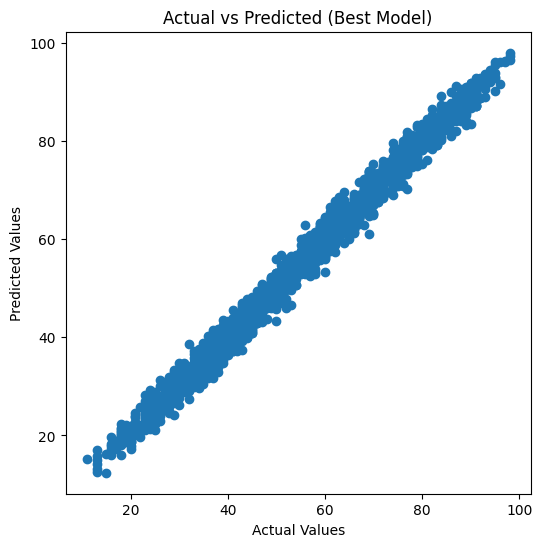

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Best Model)")
plt.show()


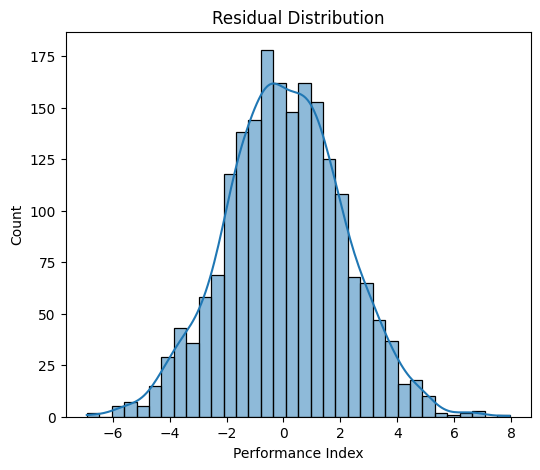

In [19]:
residuals = y_test - y_pred

plt.figure(figsize=(6,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
